[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-vision-challenge/blob/main/L0_03_Image_Filtering_in_OpenCV/notebooks/Image_Processing_Filtering_SW_Stack_OpenCV.ipynb)

## Image Processing Filtering SW Stack in OpenCV

```
+----------+      +----------+      +----------+      +----------+      +----------+      +----------+
|  Input   | ----> | Preprocess | ----> | Filtering | ----> | Postprocess | ----> | Output  |
|  Image   |      | (Optional) |      | (Mean,      |      | (Optional) |      | (Filtered |
+----------+      |          |      | Median,     |      +----------+      | Image)   |
                   |          |      | Gaussian,   |                   |           +
                   |          |      | Non-local   |                   |
                   |          |      | Means,       |                   |
                   |          |      | Bilateral)   |                   |
                   |          |      +----------+                   |
                   |          |                  | (Optional) |                   |
                   |          |                  | ConvNet    |                   +----------+
                   |          +----------+      | (Optional) |                             |
                   |                  |          |                   |
                   |                  | Spatial    |                   |
                   |                  | Transform  |                   |
                   +----------+      | (Rotation,  |                   |
                             |      | Scaling,    |                   |
                             |      | Shearing)   |                   +----------+
                             +----------+
```

In [30]:
# !pip install opencv-python  # Install OpenCV library

In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
# solve bug cv2.imshow
from google.colab.patches import cv2_imshow

### Preprocessing (Optional):

In [32]:
def preprocess_image(image):
  # Convert image to grayscale (if needed)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Normalize image (if needed)
  normalized_image = gray_image.astype(np.float32) / 255.0

  # ... (add other preprocessing steps as needed)

  return normalized_image


### Mean Filtering (Linear)

In [33]:
def mean_filtering(image, kernel_size):
  # Apply mean blur filter
  return cv2.blur(image, (kernel_size, kernel_size))


### Median Filtering (Non-linear)

In [34]:
def median_filtering(image, kernel_size):
  # Apply median blur filter
  return cv2.medianBlur(image, kernel_size)


### Gaussian Filtering (Linear)

In [35]:
def gaussian_filtering(image, kernel_size, sigma):
  # Apply Gaussian blur filter
  return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)


### Non-local Means Filtering (Non-linear)

In [36]:
def non_local_means_filtering(image, h_parameter=0.8, patch_size=7, patch_distance=11):
  # Use external library (e.g., scikit-image) for NLM filtering
  from skimage.restoration import denoise_nl_means
  # The parameter for search window size is called 'patch_distance' in denoise_nl_means
  return denoise_nl_means(image, h=h_parameter, patch_size=patch_size, patch_distance=patch_distance)

### Bilateral Filtering (Non-linear)

In [37]:
def bilateral_filtering(image, diameter=9, sigma_color=75, sigma_space=75):
  # Apply bilateral filter
  return cv2.bilateralFilter(image, d=diameter, sigmaColor=sigma_color, sigmaSpace=sigma_space)


### Spatial Transformations

In [38]:
def rotate_image(image, angle):
  # Get image dimensions
  (h, w) = image.shape[:2]

  # Define rotation center
  center = (w // 2, h // 2)

  # Generate rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

  # Apply rotation transformation
  return cv2.warpAffine(image, rotation_matrix, (w, h))

def scale_image(image, scale_factor):
  # Resize image with specified scale factor
  return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

def shear_image(image, dx, dy):
    """
    Shears an image along x and y axes.

    Args:
        image: The input image as a NumPy array.
        dx: The amount of shear along the x-axis (pixels).
        dy: The amount of shear along the y-axis (pixels).

    Returns:
        The sheared image as a NumPy array.
    """
    h, w = image.shape[:2]
    shear_matrix = np.float32([[1, dx/w, 0], [dy/h, 1, 0]])

    new_width = w + abs(dx)
    new_height = h + abs(dy)

    sheared_image = cv2.warpAffine(image, shear_matrix, (new_width, new_height))

    return sheared_image


### Main

**Image Acquisition**

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71112  100 71112    0     0   379k      0 --:--:-- --:--:-- --:--:--  381k


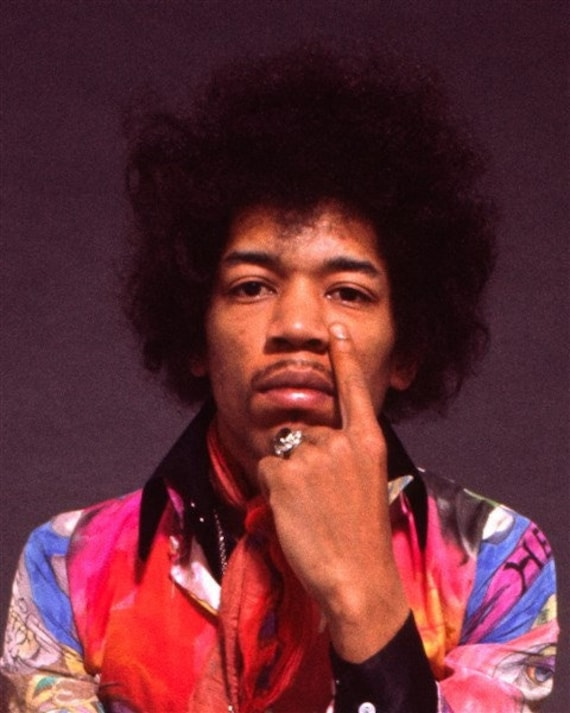

In [39]:

# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
!curl -o hendrix.jpg https://i.etsystatic.com/23861797/r/il/183b6d/3594587418/il_570xN.3594587418_fqp8.jpg

# # input_img = cv2.imread('logo.png')
input_img = cv2.imread('hendrix.jpg')
cv2_imshow(input_img)

**Processing**

In [40]:
# Preprocess the image (optional)
preprocessed_image = preprocess_image(input_img)

# Apply different filtering techniques and store the results in separate variables
mean_filtered_image = mean_filtering(preprocessed_image, kernel_size=5)
median_filtered_image = median_filtering(preprocessed_image, kernel_size=5)
gaussian_filtered_image = gaussian_filtering(preprocessed_image, kernel_size=5, sigma=1.0)
nlm_filtered_image = non_local_means_filtering(preprocessed_image)
bilateral_filtered_image = bilateral_filtering(preprocessed_image)

# Apply spatial transformations (optional)
rotated_image = rotate_image(input_img, angle=45)
scaled_image = scale_image(input_img, scale_factor=0.5)

# ... (add code for other spatial transformations)


## Visualization

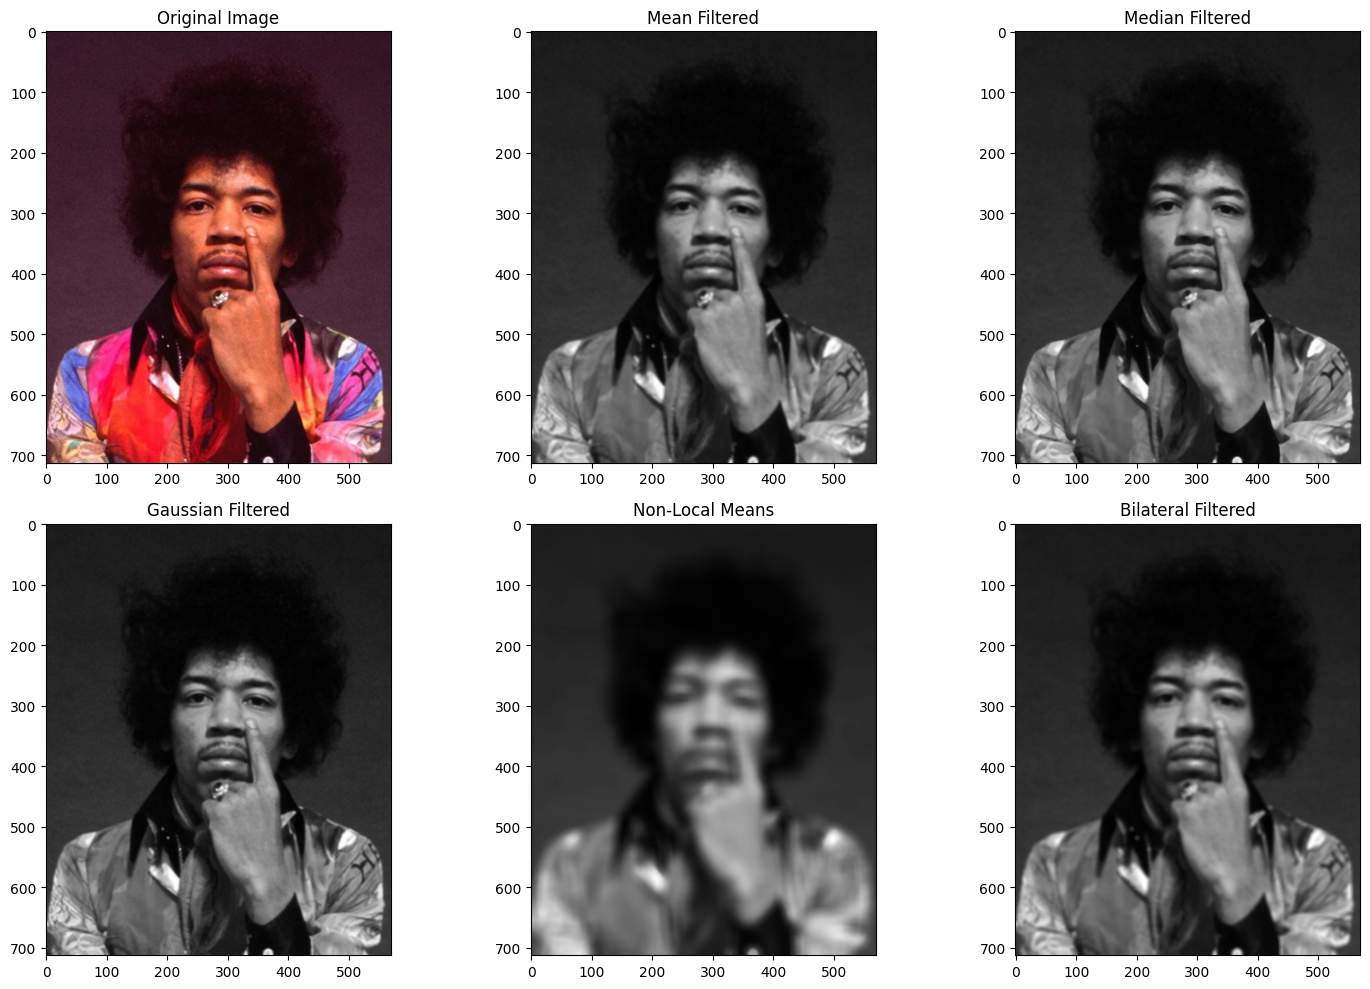

In [41]:
# Create a figure
plt.figure(figsize=(15, 10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Display mean filtered image
plt.subplot(2, 3, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title("Mean Filtered")

# Display median filtered image
plt.subplot(2, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered")

# Display Gaussian filtered image
plt.subplot(2, 3, 4)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Gaussian Filtered")

# Display Non-Local Means filtered image
plt.subplot(2, 3, 5)
plt.imshow(nlm_filtered_image, cmap='gray')
plt.title("Non-Local Means")

# Display bilateral filtered image
plt.subplot(2, 3, 6)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## References

- [Image Processing in OpenCV](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html)
- [OpenCV Tutorial in Python - GeeksForGeeks](https://www.geeksforgeeks.org/opencv-python-tutorial/)